In [2]:
!pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/bf/45/c961e3cb6ddad76b3

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Load MNIST data from OpenML and show some data
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

C:\Users\theop\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


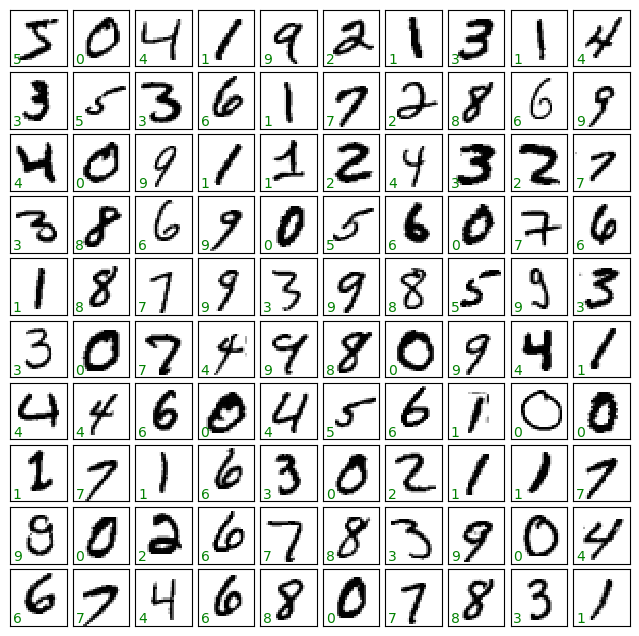

In [4]:
# Display a sample of the data
%matplotlib inline
fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i].reshape(28, 28), cmap='binary', interpolation='nearest')
    axi.text(0.05, 0.05, str(y[i]),
             transform=axi.transAxes, color='green')

In [5]:
# Scale data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.astype(np.float64))

In [6]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = X_scaled[:60000], X_scaled[60000:], y[:60000], y[60000:]

In [7]:
# Define, train and evaluate the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")


Random Forest Accuracy: 0.9704


In [8]:
# Define, train and evaluate the SVM model
svm_clf = SVC(gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)
svm_predictions = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")

SVM Accuracy: 0.9792


In [9]:
# Reshape data for CNN and normalize pixel values to be between 0 and 1
X_train_cnn = X_train.reshape((-1, 28, 28, 1))
X_test_cnn = X_test.reshape((-1, 28, 28, 1))

In [10]:
# Define a simple CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\theop\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
# Compile, train and evaluate the CNN model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=5, batch_size=64, validation_split=0.1)
cnn_test_accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)[1]
print(f"CNN Accuracy: {cnn_test_accuracy}")

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8688 - loss: 0.4259 - val_accuracy: 0.9830 - val_loss: 0.0632
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9817 - loss: 0.0582 - val_accuracy: 0.9892 - val_loss: 0.0428
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9876 - loss: 0.0400 - val_accuracy: 0.9883 - val_loss: 0.0393
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9914 - loss: 0.0286 - val_accuracy: 0.9907 - val_loss: 0.0327
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9926 - loss: 0.0213 - val_accuracy: 0.9907 - val_loss: 0.0343
CNN Accuracy: 0.9905999898910522


In [12]:
cnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

In [16]:
print(f"X_train_cnn shape: {X_train_cnn.shape}")
print(f"X_test_cnn shape: {X_test_cnn.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train_cnn shape: (60000, 28, 28, 1)
X_test_cnn shape: (10000, 28, 28, 1)
y_train shape: (60000,)
y_test shape: (10000,)


In [17]:
cnn_test_accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=2)[1]
print(f"CNN Test Accuracy: {cnn_test_accuracy}")


313/313 - 2s - 5ms/step - accuracy: 0.9906 - loss: 0.0275
CNN Test Accuracy: 0.9905999898910522


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


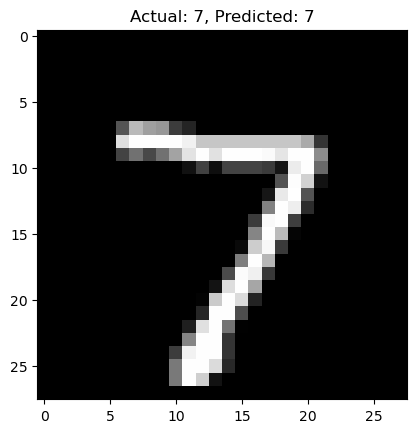

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


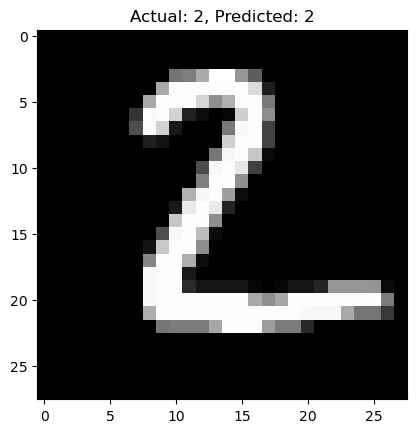

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


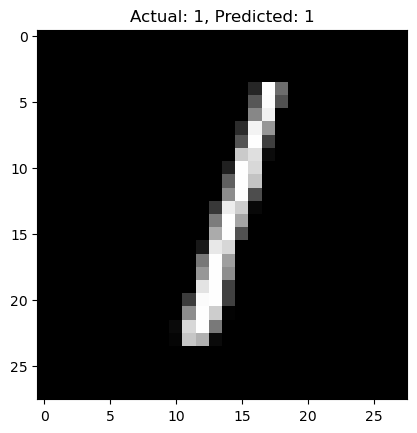

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


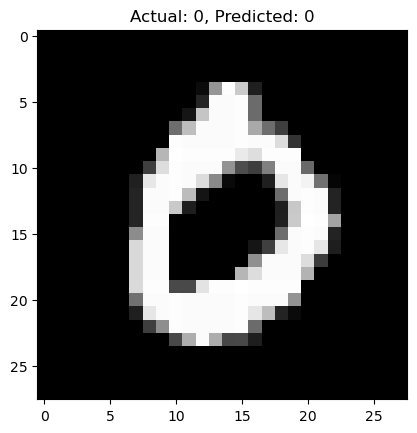

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


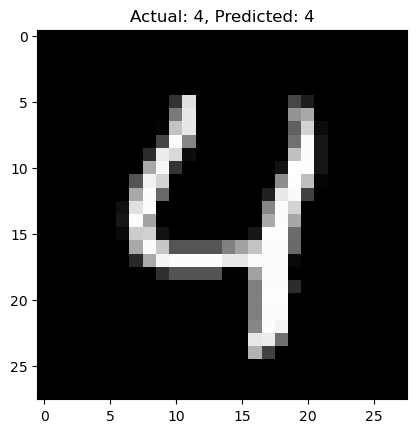

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Display a few predictions
for i in range(5):
    plt.imshow(X_test_cnn[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {y_test[i]}, Predicted: {np.argmax(cnn_model.predict(X_test_cnn[i:i+1]), axis=1)[0]}")
    plt.show()


In [21]:
cnn_model.save('mnist_cnn_model.keras')


In [22]:
import os

# Get the current working directory
current_directory = os.getcwd()
print(f"Current directory: {current_directory}")

# List all files in the current directory
files_in_directory = os.listdir(current_directory)
print(f"Files in current directory: {files_in_directory}")

# Check if your model file is in the list
model_file_name = 'mnist_cnn_model.keras'
if model_file_name in files_in_directory:
    print(f"Model file {model_file_name} is present in the current directory.")
else:
    print(f"Model file {model_file_name} is NOT found in the current directory.")


Current directory: C:\Users\theop
Files in current directory: ['.anaconda', '.atom', '.cache', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.ms-ad', '.spyder-py3', '.streamlit', '3D Objects', 'anaconda3', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'Favorites', 'Jedi', 'Links', 'Local Settings', 'Microsoft', 'MicrosoftEdgeBackups', 'mnist_cnn_model.h5', 'mnist_cnn_model.keras', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{bbfe4327-ac41-11ed-82cb-ceec553f1997}.TM.blf', 'NTUSER.DAT{bbfe4327-ac41-11ed-82cb-ceec553f1997}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{bbfe4327-ac41-11ed-82cb-ceec553f1997}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PCManger', 'peirama 1 askisis 2 ML Kunskapskontroll 2.ipynb', 'PrintHood', 'Recent', 'Saved Games', 'scikit_learn_data', 'Searches', 'SendTo', 'Start Menu

In [25]:
# Evaluate the model to confirm high accuracy is still achieved
loss, accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Test Loss: 0.02747327834367752, Test Accuracy: 0.9905999898910522
